# Data Science Bootcamp Capstone

## The Initial Setup

In [4]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

Get data and some basic information: columns, content, etc. 

In [5]:
url = 'https://raw.githubusercontent.com/fivethirtyeight/data/master/comic-characters/marvel-wikia-data.csv'
# marvel characters data
df = pd.read_csv(url, sep=",", index_col=0)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16376 entries, 1678 to 673702
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   name              16376 non-null  object 
 1   urlslug           16376 non-null  object 
 2   ID                12606 non-null  object 
 3   ALIGN             13564 non-null  object 
 4   EYE               6609 non-null   object 
 5   HAIR              12112 non-null  object 
 6   SEX               15522 non-null  object 
 7   GSM               90 non-null     object 
 8   ALIVE             16373 non-null  object 
 9   APPEARANCES       15280 non-null  float64
 10  FIRST APPEARANCE  15561 non-null  object 
 11  Year              15561 non-null  float64
dtypes: float64(2), object(10)
memory usage: 1.6+ MB


Certain columns contain drastically less non-null values than others, especially "GSM" and "EYE." 

In [6]:
df.head(10)
# df.describe()

,name,urlslug,ID,ALIGN,EYE,HAIR,SEX,GSM,ALIVE,APPEARANCES,FIRST APPEARANCE,Year
page_id,,,,,,,,,,,,
1678,Spider-Man (Peter Parker),\/Spider-Man_(Peter_Parker),Secret Identity,Good Characters,Hazel Eyes,Brown Hair,Male Characters,NaN,Living Characters,4043.0,Aug-62,1962.0
7139,Captain America (Steven Rogers),\/Captain_America_(Steven_Rogers),Public Identity,Good Characters,Blue Eyes,White Hair,Male Characters,NaN,Living Characters,3360.0,Mar-41,1941.0
64786,"Wolverine (James \""Logan\"" Howlett)",\/Wolverine_(James_%22Logan%22_Howlett),Public Identity,Neutral Characters,Blue Eyes,Black Hair,Male Characters,NaN,Living Characters,3061.0,Oct-74,1974.0
1868,"Iron Man (Anthony \""Tony\"" Stark)",\/Iron_Man_(Anthony_%22Tony%22_Stark),Public Identity,Good Characters,Blue Eyes,Black Hair,Male Characters,NaN,Living Characters,2961.0,Mar-63,1963.0
2460,Thor (Thor Odinson),\/Thor_(Thor_Odinson),No Dual Identity,Good Characters,Blue Eyes,Blond Hair,Male Characters,NaN,Living Characters,2258.0,Nov-50,1950.0
2458,Benjamin Grimm (Earth-616),\/Benjamin_Grimm_(Earth-616),Public Identity,Good Characters,Blue Eyes,No Hair,Male Characters,NaN,Living Characters,2255.0,Nov-61,1961.0
2166,Reed Richards (Earth-616),\/Reed_Richards_(Earth-616),Public Identity,Good Characters,Brown Eyes,Brown Hair,Male Characters,NaN,Living Characters,2072.0,Nov-61,1961.0
1833,Hulk (Robert Bruce Banner),\/Hulk_(Robert_Bruce_Banner),Public Identity,Good Characters,Brown Eyes,Brown Hair,Male Characters,NaN,Living Characters,2017.0,May-62,1962.0
29481,Scott Summers (Earth-616),\/Scott_Summers_(Earth-616),Public Identity,Neutral Characters,Brown Eyes,Brown Hair,Male Characters,NaN,Living Characters,1955.0,Sep-63,1963.0


In [7]:
df.shape

(16376, 12)

## Exploring the Data

Now: trying to find some trends displayed by the data. Trying out some visualizations to see if they reveal anything.

[Text(0.5, 1.0, 'Appearances Grouped by Alignment')]

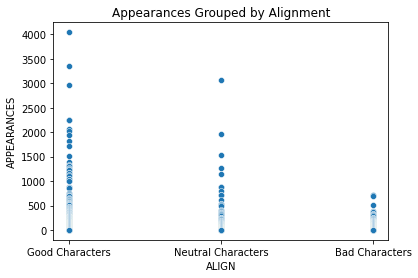

In [9]:
df.groupby('ALIGN').head()
sns.scatterplot(x='ALIGN', y='APPEARANCES', data=df).set(title="Appearances Grouped by Alignment")

[Text(0.5, 1.0, 'Appearances Grouped by Alignment')]

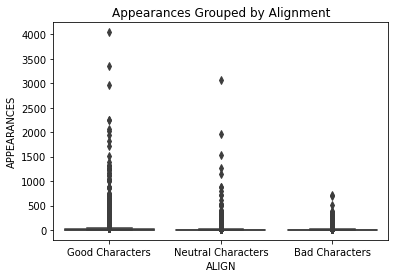

In [10]:
sns.boxplot(x='ALIGN', y='APPEARANCES', data=df).set(title="Appearances Grouped by Alignment")

The scatterplot and boxplot both seem to indicate that the characters with the highest number of comic appearances are aligned good. Given the scale, however, the boxplot doesn't seem to be a good way to represent the data, as the box itself is too condensed for all three alignments. 

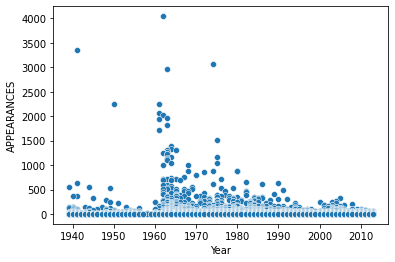

In [30]:
sns.scatterplot(x="Year", y="APPEARANCES", data=df)


Since the year indicates the year of first appearance in a comic book, this seems to indicate that around 1960-70 saw the most new characters introduced.

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


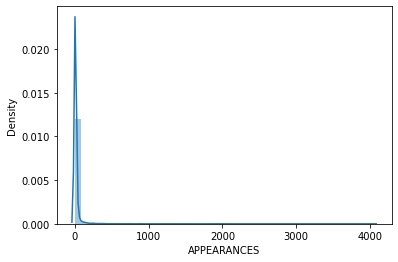

In [31]:
sns.distplot(df.APPEARANCES)

In [14]:
df["APPEARANCES"].max()

4043.0

Since the dataset contains a very large number of characters, many of which may be incredibly minor, the shape of the "APPEARANCES" distribution plot makes sense. The average number of appearances may be much lower than the max.

In [42]:
blue = (df['EYE'].values == ('Blue Eyes')).sum()
brown = (df['EYE'].values == ('Brown Eyes')).sum()
black = (df['EYE'].values == ('Black Eyes')).sum()
hazel = (df['EYE'].values == ('Hazel Eyes')).sum()

print(blue, brown, black, hazel)

1962 1924 555 76


In [45]:
male = (df['SEX'].values == ('Male Characters')).sum()
female = (df['SEX'].values == ('Female Characters')).sum()
print(male, female)

11638 3837


In [16]:
eyes = df.groupby("EYE").count()
eyes.head(10)

,name,urlslug,ID,ALIGN,HAIR,SEX,GSM,ALIVE,APPEARANCES,FIRST APPEARANCE,Year
EYE,,,,,,,,,,,
Amber Eyes,10,10,10,8,10,10,0,10,10,6,6
Black Eyeballs,3,3,3,3,3,3,0,3,3,3,3
Black Eyes,555,555,481,451,524,535,5,555,520,514,514
Blue Eyes,1962,1962,1792,1757,1906,1951,21,1962,1874,1857,1857
Brown Eyes,1924,1924,1689,1669,1885,1921,27,1924,1850,1821,1821
Compound Eyes,1,1,0,1,0,1,0,1,1,1,1
Gold Eyes,14,14,11,14,14,13,0,14,14,14,14
Green Eyes,613,613,562,557,585,600,10,613,561,580,580
Grey Eyes,95,95,84,86,93,95,1,95,91,92,92


In [17]:
eyes["name"]
# plt.figure(figsize=(20,8))
# sns.barplot(x="EYE", y="APPEARANCES", data=df)

EYE
Amber Eyes           10
Black Eyeballs        3
Black Eyes          555
Blue Eyes          1962
Brown Eyes         1924
Compound Eyes         1
Gold Eyes            14
Green Eyes          613
Grey Eyes            95
Hazel Eyes           76
Magenta Eyes          2
Multiple Eyes         7
No Eyes               7
One Eye              21
Orange Eyes          25
Pink Eyes            21
Purple Eyes          31
Red Eyes            508
Silver Eyes          12
Variable Eyes        49
Violet Eyes          11
White Eyes          400
Yellow Eyeballs       6
Yellow Eyes         256
Name: name, dtype: int64

Blue and Brown eyes are the most common for comic book characters, by far, as indicated by the data grouped by eye color.

## Note and Extra

Something to note: from working with the data, it can be seen that several columns are missing substantial data. This is also something that was shown when the non-null values were listed. So, depending on what this dataset would be used for, further analysis may be necessary to determine if there are enough points for the purpose.

In [18]:
df.describe()

,APPEARANCES,Year
count,15280.000000,15561.000000
mean,17.033377,1984.951803
std,96.372959,19.663571
min,1.000000,1939.000000
25%,1.000000,1974.000000
50%,3.000000,1990.000000
75%,8.000000,2000.000000
max,4043.000000,2013.000000


The summary statistics for the quantitative columns (as the boxplots earlier attempted to represent) indicate that a majority of the documented characters had very few appearances. This may explain why there may be missing info for their rows, since minor characters with little backstory may have less available information. This table also shows, however, that the newest documented comic character had their first appearance in 2013, which indicates that the dataset could be slightly outdated.